In [1]:
!git clone https://github.com/DhrubaAdhikary/ERA_V2.git/

Cloning into 'ERA_V2'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 125 (delta 56), reused 87 (delta 30), pack-reused 0
Receiving objects: 100% (125/125), 24.42 MiB | 25.03 MiB/s, done.
Resolving deltas: 100% (56/56), done.


CODE BLOCK: 1

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from ERA_V2.S6.Part2.model import Net
from ERA_V2.S6.Part2.utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [8]:
!pip install torchsummary
from torchsummary import summary

device = torch.device("cuda")
model = Net()
model = model.to('cuda')
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,320
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 30, 22, 22]           4,350
              ReLU-8           [-1, 30, 22, 22]               0
       BatchNorm2d-9           [-1, 30, 22, 22]              60
           Conv2d-10           [-1, 30, 11, 11]             930
             ReLU-11           [-1, 30, 11, 11]               0
      BatchNorm2d-12           [-1, 30, 11, 11]              60
           Conv2d-13             [-1, 16, 9, 9]           4,336
             ReLU-14             [-1, 1

CODE BLOCK: 3

In [9]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [10]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 37526083.90it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 79173656.09it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 30626359.62it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5792194.82it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [11]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

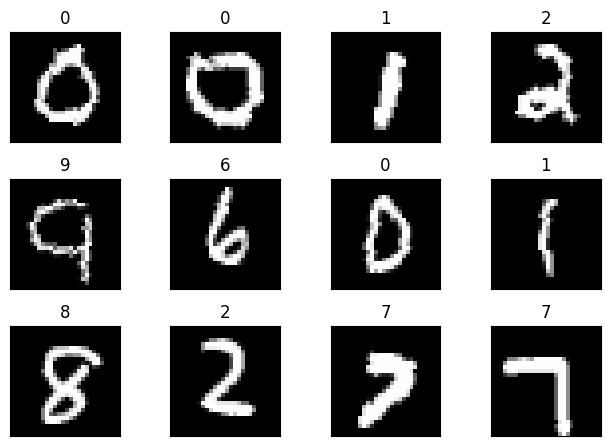

In [12]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [13]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=0.0990 Batch_id=117 Accuracy=87.09: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0666, Accuracy: 9835/10000 (98.35%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.1232 Batch_id=117 Accuracy=97.87: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 0.0574, Accuracy: 9831/10000 (98.31%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.0495 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:23<00:00,  5.00it/s]


Test set: Average loss: 0.0354, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.0561 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: 0.0288, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.0212 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0255, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.0566 Batch_id=117 Accuracy=98.82: 100%|██████████| 118/118 [00:21<00:00,  5.38it/s]


Test set: Average loss: 0.0242, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 7


Train: Loss=0.0220 Batch_id=117 Accuracy=98.82: 100%|██████████| 118/118 [00:22<00:00,  5.15it/s]


Test set: Average loss: 0.0228, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 8


Train: Loss=0.0885 Batch_id=117 Accuracy=98.95: 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]


Test set: Average loss: 0.0266, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 9


Train: Loss=0.0089 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:23<00:00,  5.11it/s]


Test set: Average loss: 0.0223, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 10


Train: Loss=0.0120 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0212, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 11


Train: Loss=0.0099 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 12


Train: Loss=0.0216 Batch_id=117 Accuracy=99.35: 100%|██████████| 118/118 [00:22<00:00,  5.15it/s]


Test set: Average loss: 0.0172, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 13


Train: Loss=0.0535 Batch_id=117 Accuracy=99.37: 100%|██████████| 118/118 [00:22<00:00,  5.22it/s]


Test set: Average loss: 0.0165, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 14


Train: Loss=0.0378 Batch_id=117 Accuracy=99.35: 100%|██████████| 118/118 [00:21<00:00,  5.40it/s]


Test set: Average loss: 0.0166, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 15


Train: Loss=0.0679 Batch_id=117 Accuracy=99.40: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.0161, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 16


Train: Loss=0.0075 Batch_id=117 Accuracy=99.38: 100%|██████████| 118/118 [00:22<00:00,  5.19it/s]


Test set: Average loss: 0.0164, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 17


Train: Loss=0.0126 Batch_id=117 Accuracy=99.39: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0163, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 18


Train: Loss=0.0030 Batch_id=117 Accuracy=99.44: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0162, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 19


Train: Loss=0.0026 Batch_id=117 Accuracy=99.40: 100%|██████████| 118/118 [00:23<00:00,  5.06it/s]


Test set: Average loss: 0.0163, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 20


Train: Loss=0.0599 Batch_id=117 Accuracy=99.42: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0162, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 5.0000e-04.


[]

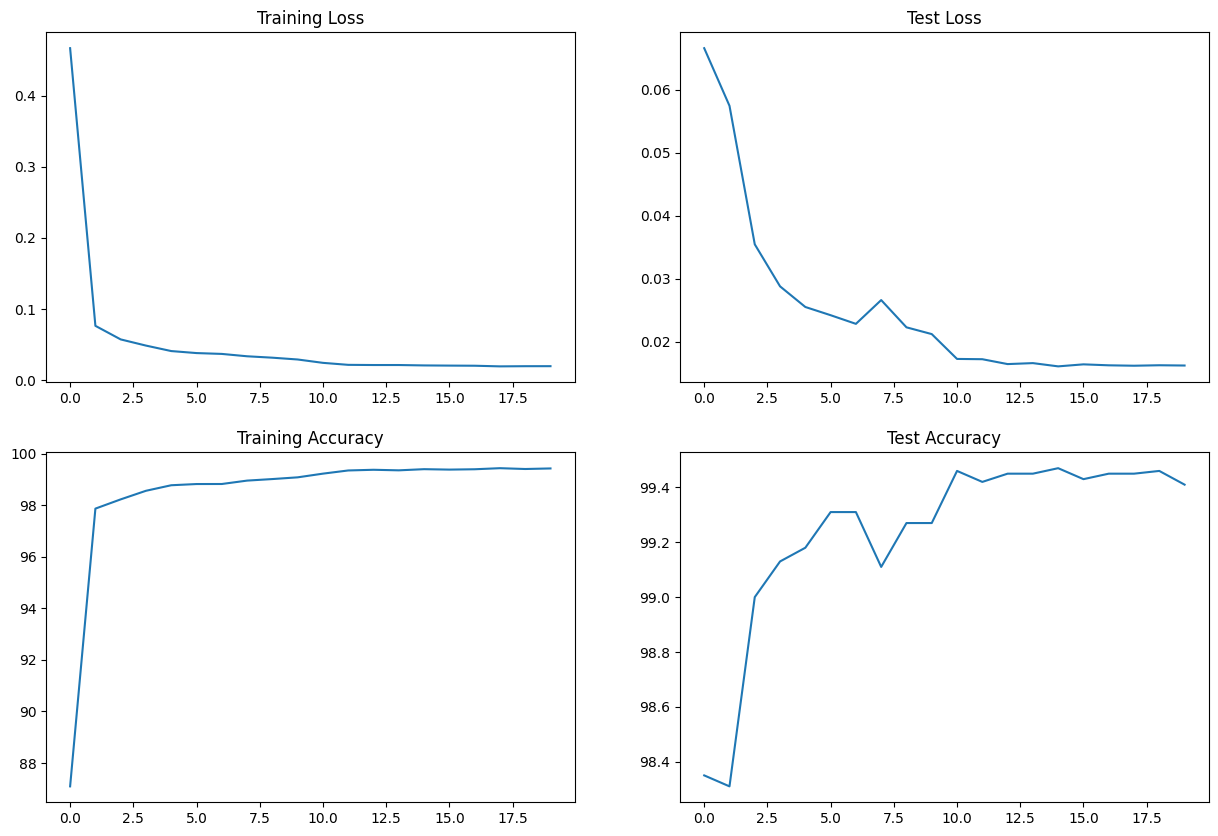

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()